In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_parquet("/Users/michaelbrady/Documents/repo/DU-VIRT-AI-PT-11-2024-U-LOLC/ny_ride_fair_optimization/nik_folder/Resources/model_df.parquet")
pd.set_option('display.max_columns', None)
df


,"('second_of_day',)","('day_of_year',)","('weekend',)","('holiday',)","('morning_rush',)","('evening rush',)","('prcp',)","('temp',)","('PUx',)","('PUy',)","('DOx',)","('DOy',)","('distance',)","('duration(sec)',)","('fare',)","('tolls',)","('airport',)","('congestion',)","('total',)","('class',)","('PU_Bronx',)","('PU_Brooklyn',)","('PU_Manhattan',)","('PU_Queens',)","('PU_Staten Island',)","('DO_Bronx',)","('DO_Brooklyn',)","('DO_Manhattan',)","('DO_Queens',)","('DO_Staten Island',)"
0,5,1,False,1,0,0,0.0,42.80,-8.213879e+06,4.960411e+06,-8.232220e+06,4.983524e+06,18.85,1599.0,70.00,6.94,0.0,0.0,95.88,0,False,False,False,True,False,False,False,True,False,False
1,9,1,False,1,0,0,0.0,42.80,-8.220657e+06,4.992372e+06,-8.218525e+06,4.993771e+06,2.47,785.0,14.59,0.00,0.0,0.0,14.59,1,True,False,False,False,False,True,False,False,False,False
2,33,1,False,1,0,0,0.0,42.80,-8.231953e+06,4.974857e+06,-8.232025e+06,4.972525e+06,2.02,474.0,20.62,0.00,0.0,0.0,20.62,2,False,False,False,True,False,False,True,False,False,False
3,38,1,False,1,0,0,0.0,42.80,-8.212420e+06,4.977409e+06,-8.216190e+06,4.976140e+06,2.47,459.0,23.20,0.00,0.0,0.0,23.20,2,False,False,False,True,False,False,False,False,True,False
4,42,1,False,1,0,0,0.0,42.80,-8.235990e+06,4.975327e+06,-8.235160e+06,4.976716e+06,1.06,335.0,7.90,0.00,0.0,2.5,15.48,0,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6044442,85846,366,False,0,0,0,0.0,48.02,-8.217649e+06,4.988984e+06,-8.221850e+06,4.985513e+06,2.48,534.0,14.38,0.00,0.0,0.0,14.38,2,True,False,False,False,False,True,False,False,False,False
6044443,85864,366,False,0,0,0,0.0,48.02,-8.234034e+06,4.964909e+06,-8.231941e+06,4.963280e+06,1.58,488.0,15.01,0.00,0.0,0.0,15.01,2,False,True,False,False,False,False,True,False,False,False
6044444,85870,366,False,0,0,0,0.0,48.02,-8.236077e+06,4.972248e+06,-8.236077e+06,4.972248e+06,0.60,256.0,5.80,0.00,0.0,2.5,10.80,0,False,False,True,False,False,False,False,True,False,False
6044445,86042,366,False,0,0,0,0.0,48.02,-8.220615e+06,4.964609e+06,-8.224081e+06,4.965819e+06,1.36,266.0,8.92,0.00,0.0,0.0,8.92,1,False,False,False,True,False,False,True,False,False,False


In [ ]:
# fix a few issues right quick

pd.set_option('display.max_columns', None)
df.columns = df.columns.str.replace(r"[()',]", "", regex=True).str.strip()
df = df.replace({True: 1, False: 0})

df.rename(columns={"fore": "fare"}, inplace=True)
df.rename(columns={"class": "service"}, inplace=True)
df

/var/folders/vt/jy8dcmxj29vfz95p7lls9h1m0000gn/T/ipykernel_84224/2756985136.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


,second_of_day,day_of_year,weekend,holiday,morning_rush,evening rush,prcp,temp,PUx,PUy,DOx,DOy,distance,durationsec,fare,tolls,airport,congestion,total,service,PU_Bronx,PU_Brooklyn,PU_Manhattan,PU_Queens,PU_Staten Island,DO_Bronx,DO_Brooklyn,DO_Manhattan,DO_Queens,DO_Staten Island
0,5,1,0,1,0,0,0.0,42.80,-8.213879e+06,4.960411e+06,-8.232220e+06,4.983524e+06,18.85,1599.0,70.00,6.94,0.0,0.0,95.88,0,0,0,0,1,0,0,0,1,0,0
1,9,1,0,1,0,0,0.0,42.80,-8.220657e+06,4.992372e+06,-8.218525e+06,4.993771e+06,2.47,785.0,14.59,0.00,0.0,0.0,14.59,1,1,0,0,0,0,1,0,0,0,0
2,33,1,0,1,0,0,0.0,42.80,-8.231953e+06,4.974857e+06,-8.232025e+06,4.972525e+06,2.02,474.0,20.62,0.00,0.0,0.0,20.62,2,0,0,0,1,0,0,1,0,0,0
3,38,1,0,1,0,0,0.0,42.80,-8.212420e+06,4.977409e+06,-8.216190e+06,4.976140e+06,2.47,459.0,23.20,0.00,0.0,0.0,23.20,2,0,0,0,1,0,0,0,0,1,0
4,42,1,0,1,0,0,0.0,42.80,-8.235990e+06,4.975327e+06,-8.235160e+06,4.976716e+06,1.06,335.0,7.90,0.00,0.0,2.5,15.48,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6044442,85846,366,0,0,0,0,0.0,48.02,-8.217649e+06,4.988984e+06,-8.221850e+06,4.985513e+06,2.48,534.0,14.38,0.00,0.0,0.0,14.38,2,1,0,0,0,0,1,0,0,0,0
6044443,85864,366,0,0,0,0,0.0,48.02,-8.234034e+06,4.964909e+06,-8.231941e+06,4.963280e+06,1.58,488.0,15.01,0.00,0.0,0.0,15.01,2,0,1,0,0,0,0,1,0,0,0
6044444,85870,366,0,0,0,0,0.0,48.02,-8.236077e+06,4.972248e+06,-8.236077e+06,4.972248e+06,0.60,256.0,5.80,0.00,0.0,2.5,10.80,0,0,0,1,0,0,0,0,1,0,0
6044445,86042,366,0,0,0,0,0.0,48.02,-8.220615e+06,4.964609e+06,-8.224081e+06,4.965819e+06,1.36,266.0,8.92,0.00,0.0,0.0,8.92,1,0,0,0,1,0,0,1,0,0,0


In [ ]:
# starting to develop the idea for the target

df["profit_per_hour"] = df["fare"] / (df["durationsec"] / 3600).round(2)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.loc[df["profit_per_hour"] > 1]

In [ ]:
# create clusters with coordinates and 

pu_features = ["PUx", "PUy", "profit_per_hour"]
do_features = ["DOx", "DOy", "profit_per_hour"]

scaler_pu = StandardScaler()
pu_scaled = scaler_pu.fit_transform(df[pu_features])

scaler_do = StandardScaler()
do_scaled = scaler_do.fit_transform(df[do_features])


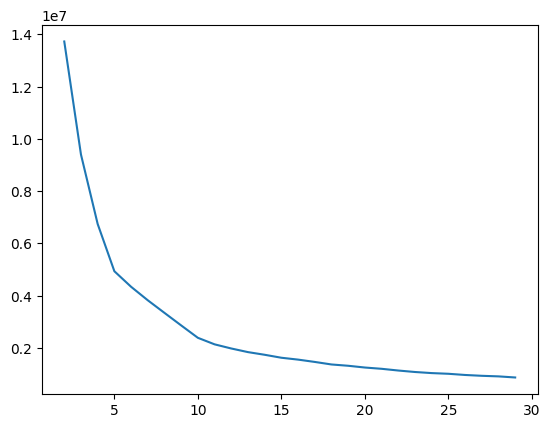

In [216]:
inertia = []
K_range = range(2, 30) 

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pu_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia)
plt.show()


In [ ]:
# Set optimal K HERE

pu_k = 10 
kmeans = KMeans(n_clusters=pu_k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(pu_scaled)


/opt/anaconda3/envs/dev/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


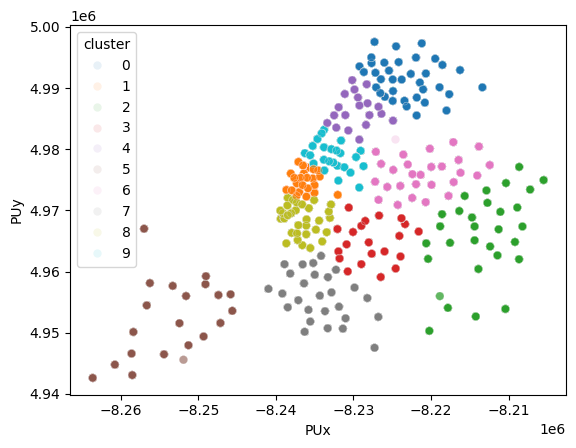

In [ ]:
sns.scatterplot(x=df["PUx"], y=df["PUy"], hue=df["cluster"], palette="tab10", alpha=0.01)
plt.show()

In [ ]:

df_taxi = df[(df["service"] == 0) & (df["fare"] > 0)]
df_uber = df[(df["service"] == 1) & (df["fare"] > 0)]
df_lyft = df[(df["service"] == 2) & (df["fare"] > 0)]


In [ ]:
df_uber

,second_of_day,day_of_year,weekend,holiday,morning_rush,evening rush,prcp,temp,PUx,PUy,DOx,DOy,distance,durationsec,fare,tolls,airport,congestion,total,service,PU_Bronx,PU_Brooklyn,PU_Manhattan,PU_Queens,PU_Staten Island,DO_Bronx,DO_Brooklyn,DO_Manhattan,DO_Queens,DO_Staten Island,cluster,profit_per_hour
1,9,1,0,1,0,0,0.0,42.80,-8.220657e+06,4.992372e+06,-8.218525e+06,4.993771e+06,2.47,785.0,14.59,0.0,0.0,0.00,14.59,1,1,0,0,0,0,1,0,0,0,0,3,66.909554
8,75,1,0,1,0,0,0.0,42.80,-8.221833e+06,4.988439e+06,-8.221833e+06,4.988439e+06,0.54,172.0,8.94,0.0,0.0,0.00,8.94,1,1,0,0,0,0,1,0,0,0,0,3,187.116279
13,162,1,0,1,0,0,0.0,42.80,-8.236580e+06,4.974117e+06,-8.232857e+06,4.980010e+06,4.19,1323.0,25.24,0.0,0.0,2.75,27.99,1,0,0,1,0,0,0,0,1,0,0,1,68.680272
19,202,1,0,1,0,0,0.0,42.80,-8.236394e+06,4.976052e+06,-8.236580e+06,4.974117e+06,2.80,2453.0,46.35,0.0,0.0,2.75,49.10,1,0,0,1,0,0,0,0,1,0,0,1,68.022829
27,257,1,0,1,0,0,0.0,42.80,-8.236601e+06,4.964303e+06,-8.227168e+06,4.992488e+06,17.92,2152.0,51.24,0.0,0.0,2.75,53.99,1,0,1,0,0,0,1,0,0,0,0,6,85.717472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6044436,85824,366,0,0,0,0,0.0,48.02,-8.221343e+06,4.975804e+06,-8.222429e+06,4.972033e+06,0.76,332.0,8.41,0.0,0.0,0.00,8.41,1,0,0,0,1,0,0,0,0,1,0,0,91.192771
6044437,85824,366,0,0,0,0,0.0,48.02,-8.221929e+06,4.974274e+06,-8.222429e+06,4.972033e+06,0.76,332.0,8.41,0.0,0.0,0.00,8.41,1,0,0,0,1,0,0,0,0,1,0,0,91.192771
6044438,85824,366,0,0,0,0,0.0,48.02,-8.221343e+06,4.975804e+06,-8.222429e+06,4.972033e+06,0.76,332.0,8.41,0.0,0.0,0.00,8.41,1,0,0,0,1,0,0,0,0,1,0,0,91.192771
6044440,85839,366,0,0,0,0,0.0,48.02,-8.233297e+06,4.959078e+06,-8.233297e+06,4.959078e+06,0.41,197.0,7.75,0.0,0.0,0.00,7.75,1,0,1,0,0,0,0,1,0,0,0,6,141.624365


In [ ]:

df_uber["location_cluster"] = KMeans(n_clusters=10, random_state=42).fit_predict(df_uber[["PUx", "PUy"]])


/var/folders/vt/jy8dcmxj29vfz95p7lls9h1m0000gn/T/ipykernel_84224/740362681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uber["location_cluster"] = KMeans(n_clusters=10, random_state=42).fit_predict(df_uber[["PUx", "PUy"]])


In [ ]:
cluster_profitability = df_uber.groupby("location_cluster")["profit_per_hour"].mean().reset_index()
cluster_profitability

,location_cluster,profit_per_hour
0,0,73.647270
1,1,90.577050
2,2,78.466174
3,3,75.777044
4,4,75.162735
5,5,79.533682
6,6,74.693224
7,7,80.368436
8,8,89.849520
9,9,86.330061


In [ ]:
pu_features = ["PUx", "PUy"]
do_features = ["DOx", "DOy"]

scaler_pu = StandardScaler()
pu_scaled = scaler_pu.fit_transform(df[pu_features])

scaler_do = StandardScaler()
do_scaled = scaler_do.fit_transform(df[do_features])


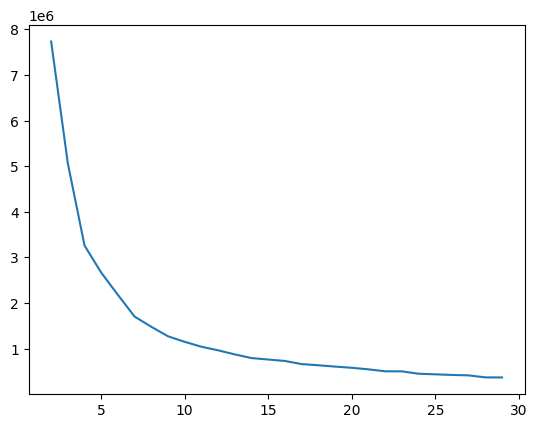

In [ ]:
"""
inertia = []
K_range = range(2, 30) 

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pu_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia)
plt.show()
"""

In [ ]:
# Set optimal K HERE

pu_k = 7 
kmeans = KMeans(n_clusters=pu_k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(pu_scaled)


/opt/anaconda3/envs/dev/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


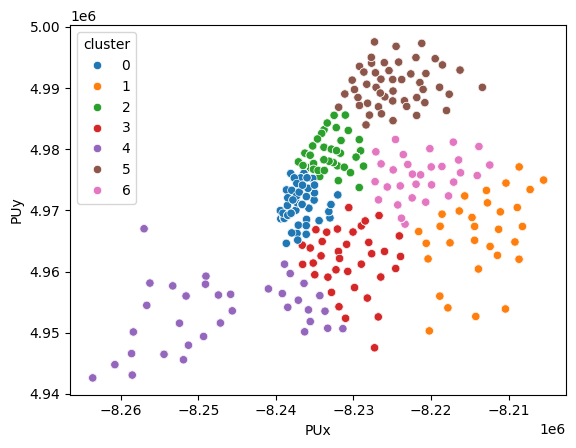

In [ ]:
sns.scatterplot(x=df["PUx"], y=df["PUy"], hue=df["cluster"], palette="tab10")
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=["cluster"])
df = pd.get_dummies(df, columns=["service"])
df

KeyError: "None of [Index(['cluster'], dtype='object')] are in the [columns]"

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


These predictions are off by about $4.56


In [ ]:

features = [
    "durationsec",
    "second_of_day",
    "day_of_year",
    "morning_rush",
    "evening rush",
    "prcp",
    "temp",
    "holiday",
    "weekend",
    "airport",
    "congestion",
    "cluster_1",
    "cluster_2",
    "cluster_3",
    "cluster_4",
    "cluster_5",
    "cluster_6",
    "PU_Bronx",
    "PU_Brooklyn",
    "PU_Manhattan",
    "PU_Queens",
    "PU_Staten Island",
    "service"
]

X = df[features]
y = df["total"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use Random Forest or XGBoost (Example below uses XGBoost)
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

xgb_model = xgb.XGBRegressor(n_estimators=500, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"These predictions are off by about ${mae:.2f}")

These predictions are off by about $4.49


In [211]:
prototype_input = {
    "durationsec": [720.0],
    "second_of_day": [45000],
    "day_of_year": [150],
    "morning_rush": [0],
    "evening rush": [1],
    "prcp": [0.2],
    "temp": [30],
    "holiday": [0],
    "weekend": [0],
    "airport": [0],
    "congestion": [3.75],
    "cluster_1": [1],
    "cluster_2": [0],
    "cluster_3": [0],
    "cluster_4": [0],
    "cluster_5": [0],
    "cluster_6": [0],
    "PU_Bronx": [0],
    "PU_Brooklyn": [0],
    "PU_Manhattan": [0],
    "PU_Queens": [0],
    "PU_Staten Island": [0],
    "service": [0]
}


test_sample_df = pd.DataFrame(prototype_input)

test_sample_df = test_sample_df[features]

total_fare = xgb_model.predict(test_sample_df)
print(f"Predicted fare: ${total_fare[0]:.2f}")

Predicted fare: $25.90


In [ ]:
total_fare

array([102.44791], dtype=float32)

In [ ]:
df[df["temp"] == df["temp"].max()]

,second_of_day,day_of_year,weekend,holiday,morning_rush,evening rush,prcp,temp,PUx,PUy,DOx,DOy,distance,durationsec,fare,tolls,airport,congestion,total,service,PU_Bronx,PU_Brooklyn,PU_Manhattan,PU_Queens,PU_Staten Island,DO_Bronx,DO_Brooklyn,DO_Manhattan,DO_Queens,DO_Staten Island,profit_per_hour,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster
3280878,54005,198,0,0,0,0,0.0,93.92,-8.224175e+06,4.994236e+06,-8.224899e+06,4.989500e+06,3.74,891.0,23.28,0.0,0.0,0.0,23.28,2,1,0,0,0,0,1,0,0,0,0,93.120000,False,False,False,False,True,False,0
3280879,54006,198,0,0,0,0,0.0,93.92,-8.233817e+06,4.978272e+06,-8.233817e+06,4.978272e+06,0.90,571.0,9.30,0.0,0.0,2.5,15.95,0,0,0,1,0,0,0,0,1,0,0,58.125000,False,True,False,False,False,False,9
3280880,54008,198,0,0,0,0,0.0,93.92,-8.232025e+06,4.972525e+06,-8.232071e+06,4.977285e+06,3.43,890.0,20.51,0.0,0.0,0.0,20.51,2,0,1,0,0,0,0,0,1,0,0,82.040000,False,False,False,False,False,False,1
3280881,54008,198,0,0,0,0,0.0,93.92,-8.223575e+06,4.979119e+06,-8.229257e+06,4.973729e+06,4.98,1037.0,27.49,0.0,2.5,0.0,29.99,2,0,0,0,1,0,0,0,0,1,0,94.793103,False,False,False,False,False,True,6
3280882,54013,198,0,0,0,0,0.0,93.92,-8.251596e+06,4.955995e+06,-8.256665e+06,4.954465e+06,5.27,1107.0,26.81,0.0,0.0,0.0,26.81,1,0,0,0,0,1,0,0,0,0,1,86.483871,False,False,False,True,False,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281734,57568,198,0,0,0,0,0.0,93.92,-8.238089e+06,4.976023e+06,-8.235160e+06,4.976716e+06,2.00,1301.0,18.40,0.0,0.0,2.5,24.64,0,0,0,1,0,0,0,0,1,0,0,51.111111,False,False,False,False,False,False,1
3281735,57570,198,0,0,0,0,0.0,93.92,-8.238642e+06,4.973338e+06,-8.235145e+06,4.977656e+06,3.28,1763.0,25.40,0.0,0.0,2.5,41.40,0,0,0,1,0,0,0,0,1,0,0,51.836735,False,False,False,False,False,False,1
3281736,57584,198,0,0,0,0,0.0,93.92,-8.233817e+06,4.978272e+06,-8.236512e+06,4.977337e+06,1.23,1352.0,19.10,0.0,0.0,2.5,27.72,0,0,0,1,0,0,0,0,1,0,0,50.263158,False,True,False,False,False,False,9
3281737,57587,198,0,0,0,0,0.0,93.92,-8.222603e+06,4.992303e+06,-8.224175e+06,4.994236e+06,1.62,445.0,9.14,0.0,0.0,0.0,9.14,1,1,0,0,0,0,1,0,0,0,0,76.166667,False,False,False,False,True,False,0


In [ ]:
df

,second_of_day,day_of_year,weekend,holiday,morning_rush,evening rush,prcp,temp,PUx,PUy,DOx,DOy,distance,durationsec,fare,tolls,airport,congestion,total,service,PU_Bronx,PU_Brooklyn,PU_Manhattan,PU_Queens,PU_Staten Island,DO_Bronx,DO_Brooklyn,DO_Manhattan,DO_Queens,DO_Staten Island,profit_per_hour,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster
0,5,1,0,1,0,0,0.0,42.80,-8.213879e+06,4.960411e+06,-8.232220e+06,4.983524e+06,18.85,1599.0,70.00,6.94,0.0,0.0,95.88,0,0,0,0,1,0,0,0,1,0,0,159.090909,True,False,False,False,False,False,2
1,9,1,0,1,0,0,0.0,42.80,-8.220657e+06,4.992372e+06,-8.218525e+06,4.993771e+06,2.47,785.0,14.59,0.00,0.0,0.0,14.59,1,1,0,0,0,0,1,0,0,0,0,66.318182,False,False,False,False,True,False,0
2,33,1,0,1,0,0,0.0,42.80,-8.231953e+06,4.974857e+06,-8.232025e+06,4.972525e+06,2.02,474.0,20.62,0.00,0.0,0.0,20.62,2,0,0,0,1,0,0,1,0,0,0,158.615385,False,True,False,False,False,False,9
3,38,1,0,1,0,0,0.0,42.80,-8.212420e+06,4.977409e+06,-8.216190e+06,4.976140e+06,2.47,459.0,23.20,0.00,0.0,0.0,23.20,2,0,0,0,1,0,0,0,0,1,0,178.461538,False,False,False,False,False,True,6
4,42,1,0,1,0,0,0.0,42.80,-8.235990e+06,4.975327e+06,-8.235160e+06,4.976716e+06,1.06,335.0,7.90,0.00,0.0,2.5,15.48,0,0,0,1,0,0,0,0,1,0,0,87.777778,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6044442,85846,366,0,0,0,0,0.0,48.02,-8.217649e+06,4.988984e+06,-8.221850e+06,4.985513e+06,2.48,534.0,14.38,0.00,0.0,0.0,14.38,2,1,0,0,0,0,1,0,0,0,0,95.866667,False,False,False,False,True,False,0
6044443,85864,366,0,0,0,0,0.0,48.02,-8.234034e+06,4.964909e+06,-8.231941e+06,4.963280e+06,1.58,488.0,15.01,0.00,0.0,0.0,15.01,2,0,1,0,0,0,0,1,0,0,0,107.214286,False,False,True,False,False,False,8
6044444,85870,366,0,0,0,0,0.0,48.02,-8.236077e+06,4.972248e+06,-8.236077e+06,4.972248e+06,0.60,256.0,5.80,0.00,0.0,2.5,10.80,0,0,0,1,0,0,0,0,1,0,0,82.857143,False,False,False,False,False,False,1
6044445,86042,366,0,0,0,0,0.0,48.02,-8.220615e+06,4.964609e+06,-8.224081e+06,4.965819e+06,1.36,266.0,8.92,0.00,0.0,0.0,8.92,1,0,0,0,1,0,0,1,0,0,0,127.428571,True,False,False,False,False,False,2
